In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Read Data from csv

In [3]:
datas=pd.read_csv("dataset/data_audio_feature.csv")

In [4]:
print(datas.shape)
print(list(datas.columns))

(5927, 43)
['Unnamed: 0', 'Name', 'Gender', 'Age', 'vLT', 'vWT', 'vTT', 'vLF', 'vWF', 'vTF', 'wavName', 'chrMean', 'chrMedian', 'chrMin', 'chrMax', 'censMean', 'censMedian', 'censMin', 'censMax', 'melMean', 'melMedian', 'melMin', 'melMax', 'mfccMean', 'mfccMedian', 'mfccMin', 'mfccMax', 'rmsMean', 'rmsMedian', 'rmsMin', 'rmsMax', 'specCentMean', 'specCentMedian', 'specCentMin', 'specCentMax', 'tonnetzMean', 'tonnetzMedian', 'tonnetzMin', 'tonnetzMax', 'z0Mean', 'z0Median', 'z0Min', 'z0Max']


In [9]:
datas.head()

,Gender,Age,vLT,vWT,vTT,vLF,vWF,vTF,chrMean,chrMedian,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
0,1,0,20.749495,6.444141,6.472626,22.192424,7.104242,6.816465,0.509367,0.500569,...,995.847887,997.151297,-0.002680,-0.001251,-0.323850,0.307498,0.046446,0.044678,0.000977,0.099121
1,1,0,20.749495,6.444141,6.472626,22.192424,7.104242,6.816465,0.529500,0.524007,...,1010.818988,968.443129,0.001882,0.001380,-0.287937,0.296318,0.046814,0.043701,0.000000,0.144531
2,1,0,20.749495,6.444141,6.472626,22.192424,7.104242,6.816465,0.523954,0.527663,...,1022.034969,965.245567,0.002758,0.003691,-0.313861,0.313737,0.051376,0.049805,0.000977,0.197266
3,1,0,20.749495,6.444141,6.472626,22.192424,7.104242,6.816465,0.495981,0.482587,...,1069.615450,979.576911,-0.003649,0.000005,-0.309805,0.282135,0.057262,0.049561,0.000977,0.221191
4,1,0,20.749495,6.444141,6.472626,22.192424,7.104242,6.816465,0.524928,0.529147,...,1075.647738,1086.040568,0.006009,0.000398,-0.314566,0.332234,0.060166,0.058594,0.000000,0.187988


Age and Gender transform Label Encoder

In [6]:
lb=LabelEncoder()

gender=datas.Gender
gender=lb.fit_transform(gender)
datas.Gender=gender

age=datas.Age
age=lb.fit_transform(age)
datas.Age=age


datas = datas.loc[:, datas.columns.isin(["Unnamed: 0","Name","wavName","melMin","melMax","specCentMin","specCentMax"])==False]
datas.head()

,Gender,Age,vLT,vWT,vTT,vLF,vWF,vTF,chrMean,chrMedian,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
0,1,0,20.749495,6.444141,6.472626,22.192424,7.104242,6.816465,0.509367,0.500569,...,995.847887,997.151297,-0.002680,-0.001251,-0.323850,0.307498,0.046446,0.044678,0.000977,0.099121
1,1,0,20.749495,6.444141,6.472626,22.192424,7.104242,6.816465,0.529500,0.524007,...,1010.818988,968.443129,0.001882,0.001380,-0.287937,0.296318,0.046814,0.043701,0.000000,0.144531
2,1,0,20.749495,6.444141,6.472626,22.192424,7.104242,6.816465,0.523954,0.527663,...,1022.034969,965.245567,0.002758,0.003691,-0.313861,0.313737,0.051376,0.049805,0.000977,0.197266
3,1,0,20.749495,6.444141,6.472626,22.192424,7.104242,6.816465,0.495981,0.482587,...,1069.615450,979.576911,-0.003649,0.000005,-0.309805,0.282135,0.057262,0.049561,0.000977,0.221191
4,1,0,20.749495,6.444141,6.472626,22.192424,7.104242,6.816465,0.524928,0.529147,...,1075.647738,1086.040568,0.006009,0.000398,-0.314566,0.332234,0.060166,0.058594,0.000000,0.187988


Data Analisis with AGE 0-adult, 1-young

In [7]:
datas["Age"].value_counts()

0    5121
1     806
Name: Age, dtype: int64

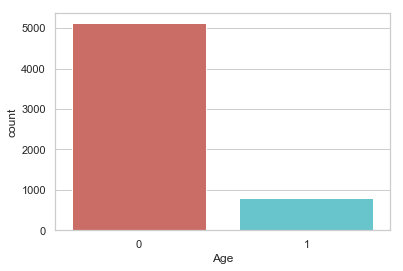

<Figure size 432x288 with 0 Axes>

In [8]:
sns.countplot(x="Age",data=datas, palette="hls")
plt.show()
plt.savefig("age.png")

Data Analisis with GENDER, 0-Female, 1-male

1    5268
0     659
Name: Gender, dtype: int64


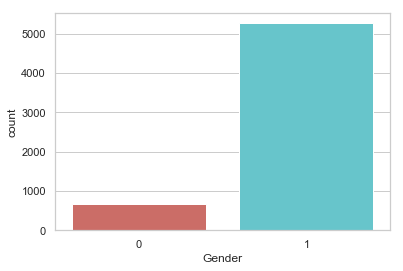

<Figure size 432x288 with 0 Axes>

In [10]:
print(datas["Gender"].value_counts())
sns.countplot(x="Gender",data=datas, palette="hls")
plt.show()
plt.savefig("gender.png")

In [15]:
datas.groupby("Age").mean()

,Gender,vLT,vWT,vTT,vLF,vWF,vTF,chrMean,chrMedian,chrMin,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
Age,,,,,,,,,,,,,,,,,,,,,
0,0.908612,19.520277,6.101491,6.119248,20.451678,6.655505,6.465141,0.50037,0.495186,0.006258,...,900.427078,851.372164,0.002063,-0.000652,-0.313299,0.319987,0.048723,0.042060,0.007821,0.178081
1,0.763027,12.050526,4.121220,4.289259,12.713209,4.552999,4.457548,0.50406,0.504144,0.003669,...,889.296114,824.560601,0.001965,0.000849,-0.318392,0.325201,0.046290,0.037571,0.007239,0.181764


In [16]:
datas.groupby("Gender").mean()

,Age,vLT,vWT,vTT,vLF,vWF,vTF,chrMean,chrMedian,chrMin,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
Gender,,,,,,,,,,,,,,,,,,,,,
0,0.289833,14.164148,4.715003,4.769410,14.814083,5.014641,5.036246,0.503874,0.516969,0.002981,...,953.011522,922.071235,0.004664,0.004501,-0.321373,0.324593,0.055142,0.048610,0.010140,0.174463
1,0.116743,19.047435,5.971953,6.008119,19.972933,6.539087,6.336729,0.500496,0.493832,0.006272,...,892.146003,838.425921,0.001723,-0.001067,-0.313068,0.320208,0.047548,0.040554,0.007442,0.179098


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score 
import numpy as np

In [12]:
target=["vLT","vWT","vTT","vLF","vWF","vTF"]

In [13]:
X = datas.loc[:, datas.columns.isin(["vLT","vWT","vTT","vLF","vWF","vTF"])==False]
X.head()

,Gender,Age,chrMean,chrMedian,chrMin,chrMax,censMean,censMedian,censMin,censMax,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
0,1,0,0.509367,0.500569,0.008377,1.0,0.274985,0.264780,0.065748,0.604772,...,995.847887,997.151297,-0.002680,-0.001251,-0.323850,0.307498,0.046446,0.044678,0.000977,0.099121
1,1,0,0.529500,0.524007,0.010924,1.0,0.281367,0.271541,0.123687,0.454199,...,1010.818988,968.443129,0.001882,0.001380,-0.287937,0.296318,0.046814,0.043701,0.000000,0.144531
2,1,0,0.523954,0.527663,0.010043,1.0,0.274743,0.266511,0.062231,0.531585,...,1022.034969,965.245567,0.002758,0.003691,-0.313861,0.313737,0.051376,0.049805,0.000977,0.197266
3,1,0,0.495981,0.482587,0.001997,1.0,0.278300,0.258304,0.107676,0.549732,...,1069.615450,979.576911,-0.003649,0.000005,-0.309805,0.282135,0.057262,0.049561,0.000977,0.221191
4,1,0,0.524928,0.529147,0.003049,1.0,0.279495,0.270466,0.107462,0.508300,...,1075.647738,1086.040568,0.006009,0.000398,-0.314566,0.332234,0.060166,0.058594,0.000000,0.187988


In [14]:
print(X.shape)
print(list(X.columns))

(5927, 30)
['Gender', 'Age', 'chrMean', 'chrMedian', 'chrMin', 'chrMax', 'censMean', 'censMedian', 'censMin', 'censMax', 'melMean', 'melMedian', 'mfccMean', 'mfccMedian', 'mfccMin', 'mfccMax', 'rmsMean', 'rmsMedian', 'rmsMin', 'rmsMax', 'specCentMean', 'specCentMedian', 'tonnetzMean', 'tonnetzMedian', 'tonnetzMin', 'tonnetzMax', 'z0Mean', 'z0Median', 'z0Min', 'z0Max']


In [17]:
from joblib import dump, load
ls=[]

In [20]:
def fit_Model(lr): 
    print(lr)
    for item in target:        
        print(item)
        y = datas.loc[:, datas.columns.isin([item])]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        lr.fit(X_train, y_train)
        pred=lr.predict(X_test)
        mae = mean_absolute_error(pred, y_test)
        mse = mean_squared_error(pred, y_test)
        rmse = np.sqrt(mse)   
        sc=lr.score(X_test, y_test)
        k={}
        k["lr"]=lr 
        k["item"]=item 
        k["score"]=sc        
        k["mae"]=mae
        k["mse"]=mse
        k["rmse"]=rmse
        print("R score: {0}, mae:{1}, mse{2}, rmse{3}".format(sc,mae,mse,rmse))
        print("-----------------------------")
        ls.append(k)     
        dump(lr, item+'.joblib')

En iyi R score: 0.87 ARDRegression-LinearRegression- BayesianRidge -TheilSenRegressor sahip

In [25]:
lr=linear_model.LinearRegression()
fit_Model(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
vLT
R score: 0.8715285828896363, mae:0.8235046764698878, mse1.1185269468118564, rmse1.0576043432266418
-----------------------------
vWT
R score: 0.8602316838387488, mae:0.2316911018465372, mse0.08570497643894691, rmse0.2927541228385126
-----------------------------
vTT
R score: 0.8350179169181132, mae:0.23841376558828717, mse0.09138823190463627, rmse0.3023048658302348
-----------------------------
vLF
R score: 0.8131719138231016, mae:1.1444599921725123, mse1.8860330007145887, rmse1.3733291669205123
-----------------------------
vWF
R score: 0.829146997128175, mae:0.2955975964699242, mse0.13119649654221463, rmse0.36221056934083884
-----------------------------
vTF
R score: 0.8612923624946436, mae:0.23373542789475876, mse0.08765532400387249, rmse0.29606641823055935
-----------------------------


In [ ]:
p.to_excel("sonuclar.xlsx")